In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [3]:
temp = df.values

In [4]:
print(temp.shape)

(1600, 6)


In [5]:
X_train=np.array((temp[:,:5]))
y = np.array((temp[:,-1]))

In [6]:
df1 = pd.DataFrame(X_train)

In [7]:
df1.head()

,0,1,2,3,4
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [8]:
df1.describe()

,0,1,2,3,4
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005
std,0.997338,1.021776,1.011768,1.017189,0.978654
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527
75%,0.682118,0.645442,0.639130,0.646290,0.650089
max,3.287205,3.438895,3.216176,2.985410,3.321770


In [9]:
#Normalisation
u=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train = (X_train-u)/std

In [10]:
X = X_train
print(X.shape)
print(y.shape)

(1600, 5)
(1600,)


## Now Section 2 implementing Linear Regression
#### We have our preprocessed data as under X and y
#### X contains all the test values and y contains target values


In [11]:
def hypothesis(X,theta):
    y_ = np.dot(X,theta)
    return y_

def error(X,y,theta):
    err = 0.0
    m=X.shape[0]
    y_ = hypothesis(X,theta)
    err = np.sum((y - y_)**2)
    return err/m

def gradient(X,y,theta) :
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m= X.shape[0]
    return grad/m
def GradientDesc(X,y,learning_rate=0.03,max_steps=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    err_list=[]
    
    for i in range(max_steps):
        e = error(X,y,theta)
        err_list.append(e)
        grad = gradient(X,y,theta)
        theta -= learning_rate*grad
    return theta,err_list

[29.58899831 94.63913609  8.36799243 45.51604131  2.46155851]


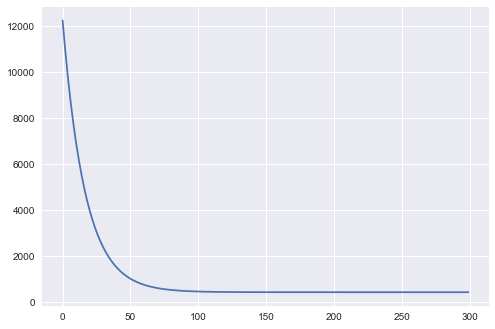

In [12]:
theta,err_list = GradientDesc(X,y)
print(theta)
plt.style.use('seaborn')
plt.plot(err_list)
plt.show()

In [13]:
#Making Predictions and computing R2 score
y_ =[]
m=X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)
    
def R2score(y,y_):
    num = np.sum((y-y_)**2)
    den = np.sum((y-y.mean())**2)
    score = 1-(num/den)
    return score*100

In [14]:
R2score(y,y_)

96.60856519806048

### Making predicitons on test data


In [15]:
X_test = pd.read_csv('Test.csv').values
Y_pred = hypothesis(X_test,theta)

In [16]:
#storing thr y_test predictions in the same format as y_train dataset
newdf = pd.DataFrame(data=Y_pred,columns=["target"])
newdf.index.name = 'Id'
newdf.to_csv('predicted.csv',index=True)